In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Dell/Downloads/SVM/SVM/mushroom.csv')
df

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1995         863    sunken       scaly     brown     yes     foul   
1996        1160    sunken       scaly    purple     yes    musty   
1997         265    convex     grooves     green     yes    fishy   
1998         411      bell      smooth     white      no  pungent   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    partial   
1            notched      crowded    narrow  chocolate  ...  universal   
2         descending      crowded     broad     purple  ...  universal   
3            notched        close     broad     orange  ...    partial   
4               free      crowded    narrow     orange  ...  universal   
...              ...          ...       ...        ...  ...        ...   
1995        attached      crowded    narrow  chocolate  ...    partial   
1996        attached      distant    narrow        red  ...    partial   
1997         notched        close    narrow       pink  ...    partial   
1998            free        close    narrow     orange  ...  universal   
1999      descending        close    narrow     purple  ...    partial   

     veil_color ring_number   ring_type spore_print_color population  habitat  \
0         brown         two   sheathing         chocolate  clustered    waste   
1         brown         two   sheathing             brown   numerous    waste   
2        yellow         two   sheathing            purple   abundant    waste   
3        yellow         two    cobwebby             green  clustered  grasses   
4         white        none        none            yellow  clustered    urban   
...         ...         ...         ...               ...        ...      ...   
1995     orange         one     flaring            purple   abundant   leaves   
1996      white         one        zone            yellow   numerous    waste   
1997      brown         two  evanescent            yellow   abundant    woods   
1998     yellow         one    cobwebby             brown   solitary    woods   
1999      white         two       large             white   numerous    urban   

          class stalk_height cap_diameter  
0     poisonous    14.276173     5.054983  
1        edible     3.952715    19.068319  
2     poisonous     9.054265     7.205884  
3     poisonous     5.226499    20.932692  
4     poisonous    14.037532    12.545245  
...         ...          ...          ...  
1995  poisonous     5.877891    17.464145  
1996  poisonous     6.500840    13.501957  
1997  poisonous    13.558064    11.270020  
1998  poisonous    11.092703     8.423199  
1999  poisonous    13.066414    21.056642  

[2000 rows x 26 columns]

In [3]:
df = df.drop(columns=['Unnamed: 0'],axis=1)

In [4]:
df.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [5]:
df.describe()

stalk_height  cap_diameter
count   2000.000000   2000.000000
mean       8.449118     12.314345
std        3.697217      7.048845
min        2.000000      1.000000
25%        5.291009      5.723521
50%        8.318596     12.124902
75%       11.781272     18.698605
max       15.095066     25.000054

#Utilize histograms, box plots, or density plots to understand feature distributions

array([[<Axes: title={'center': 'stalk_height'}>,
        <Axes: title={'center': 'cap_diameter'}>]], dtype=object)

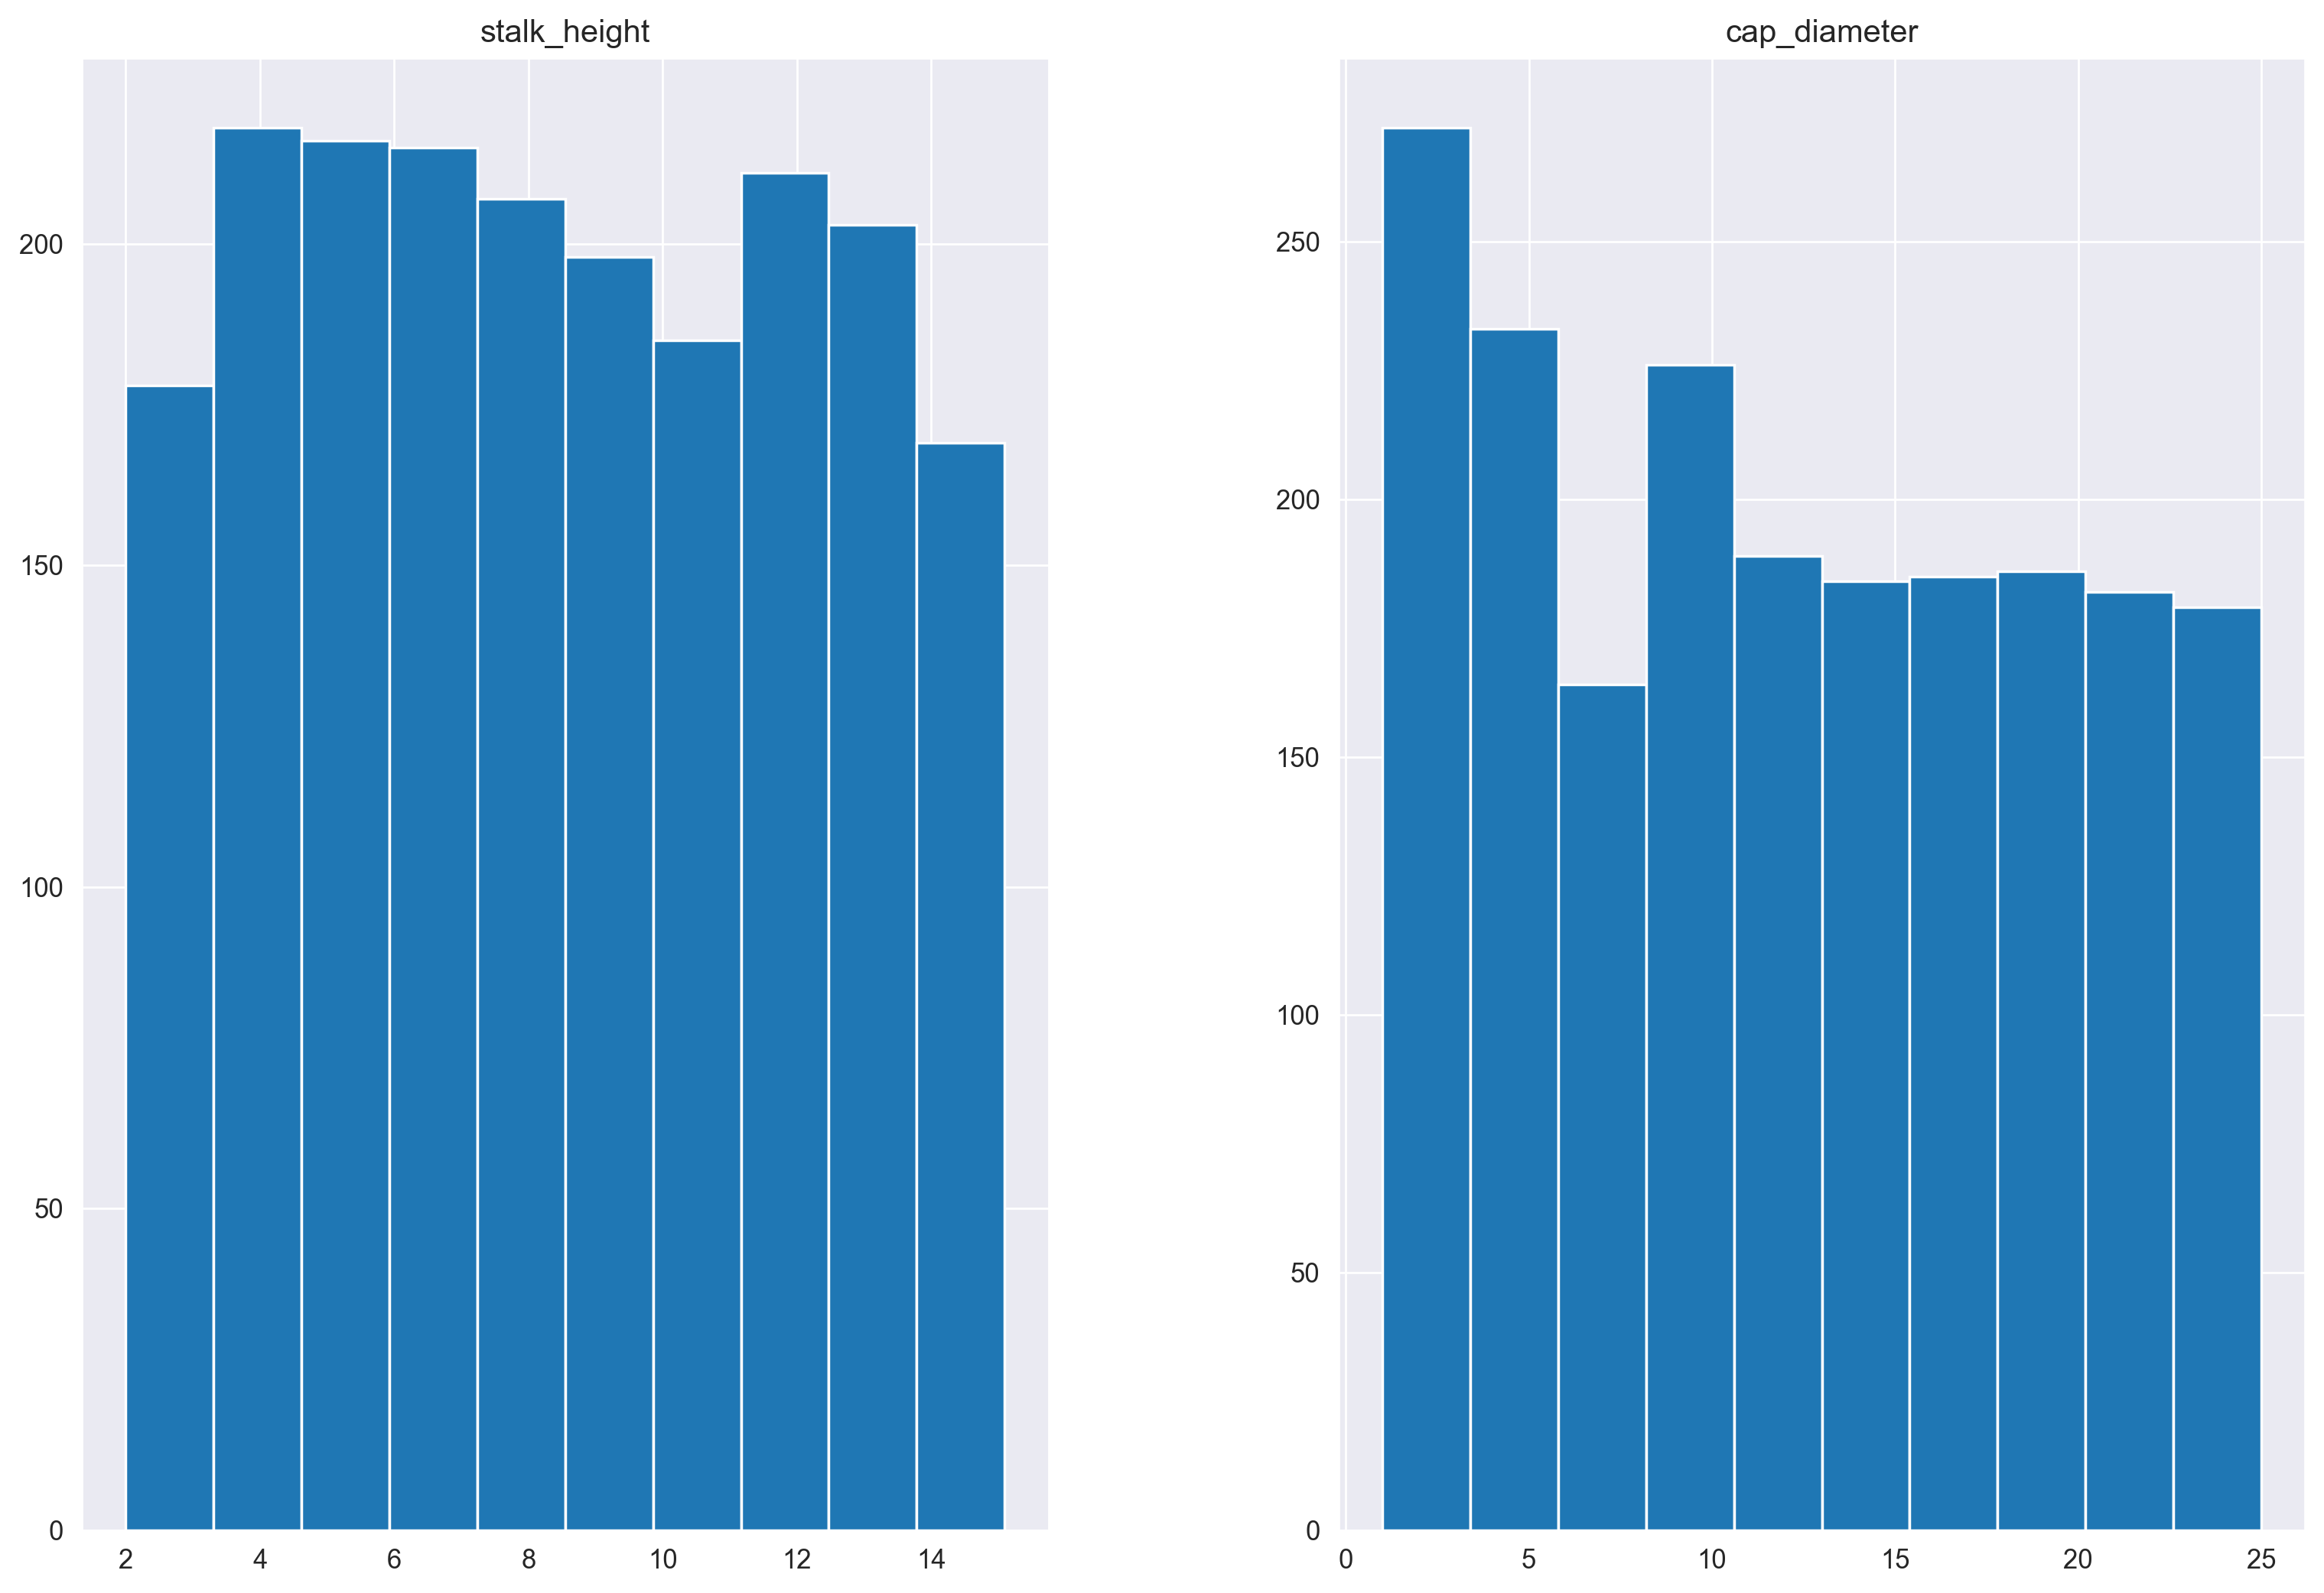

In [6]:
df.hist(figsize=(15,10))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

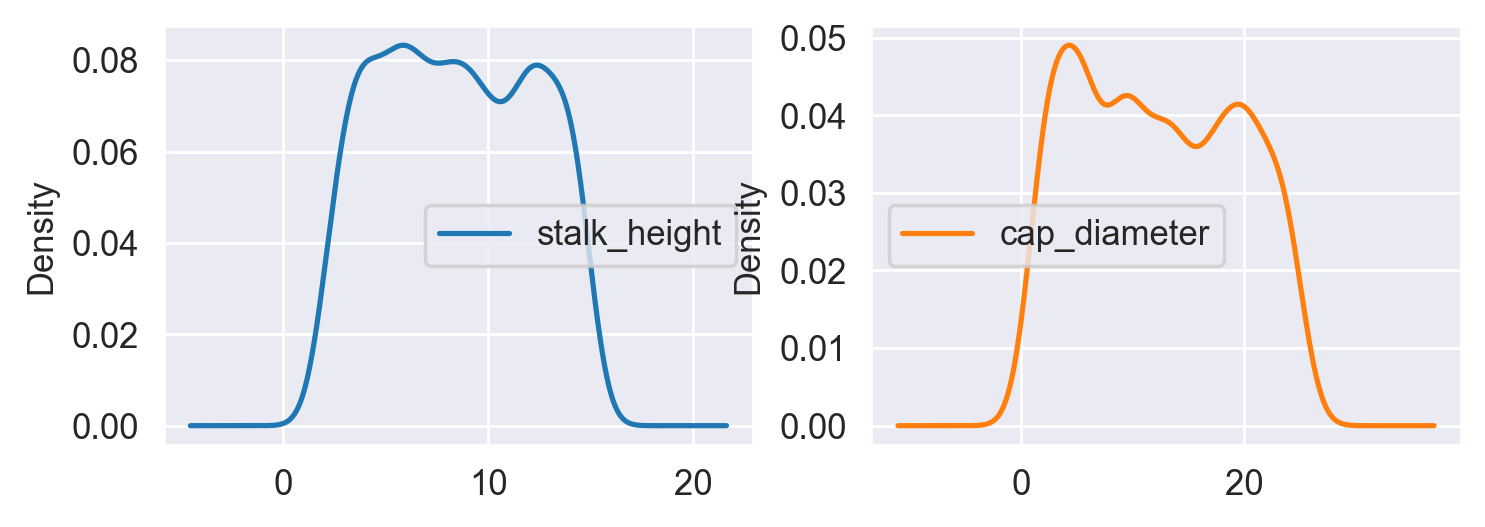

In [7]:
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(14, 10))

<Axes: >

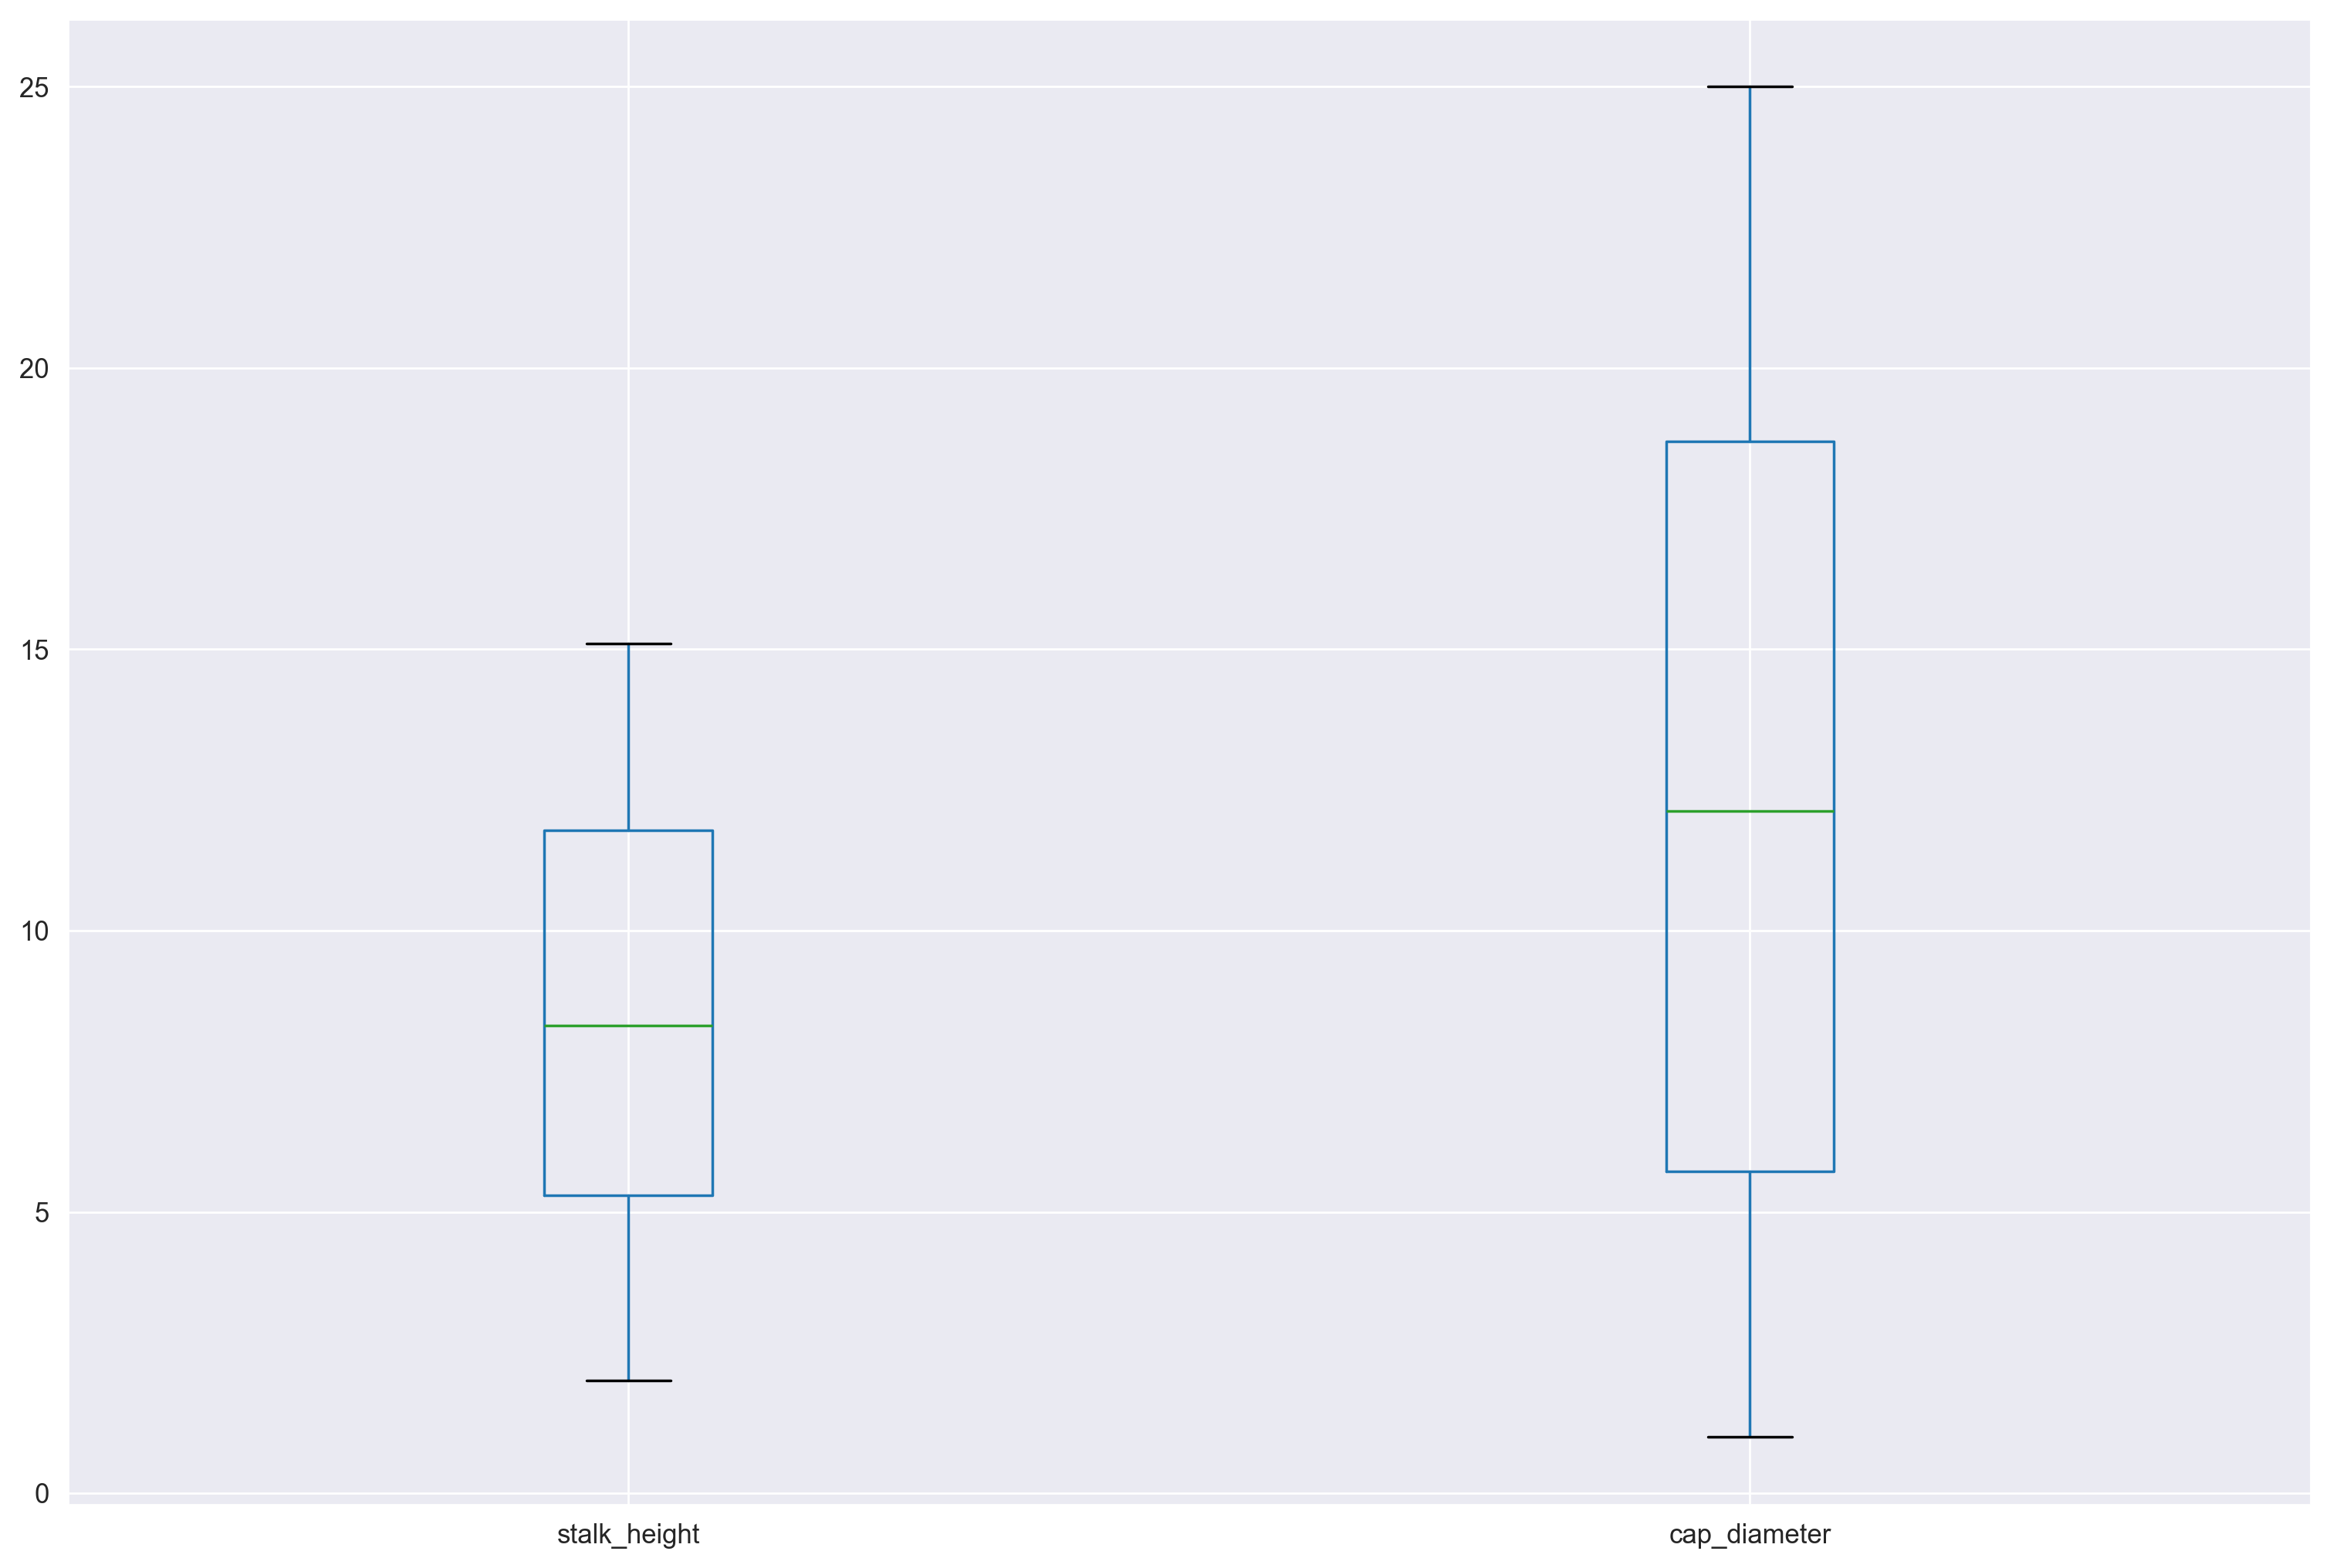

In [8]:
#Boxplot
df.boxplot(figsize=(15,10))

Investigate feature correlations to discern relationships within the data

<Axes: >

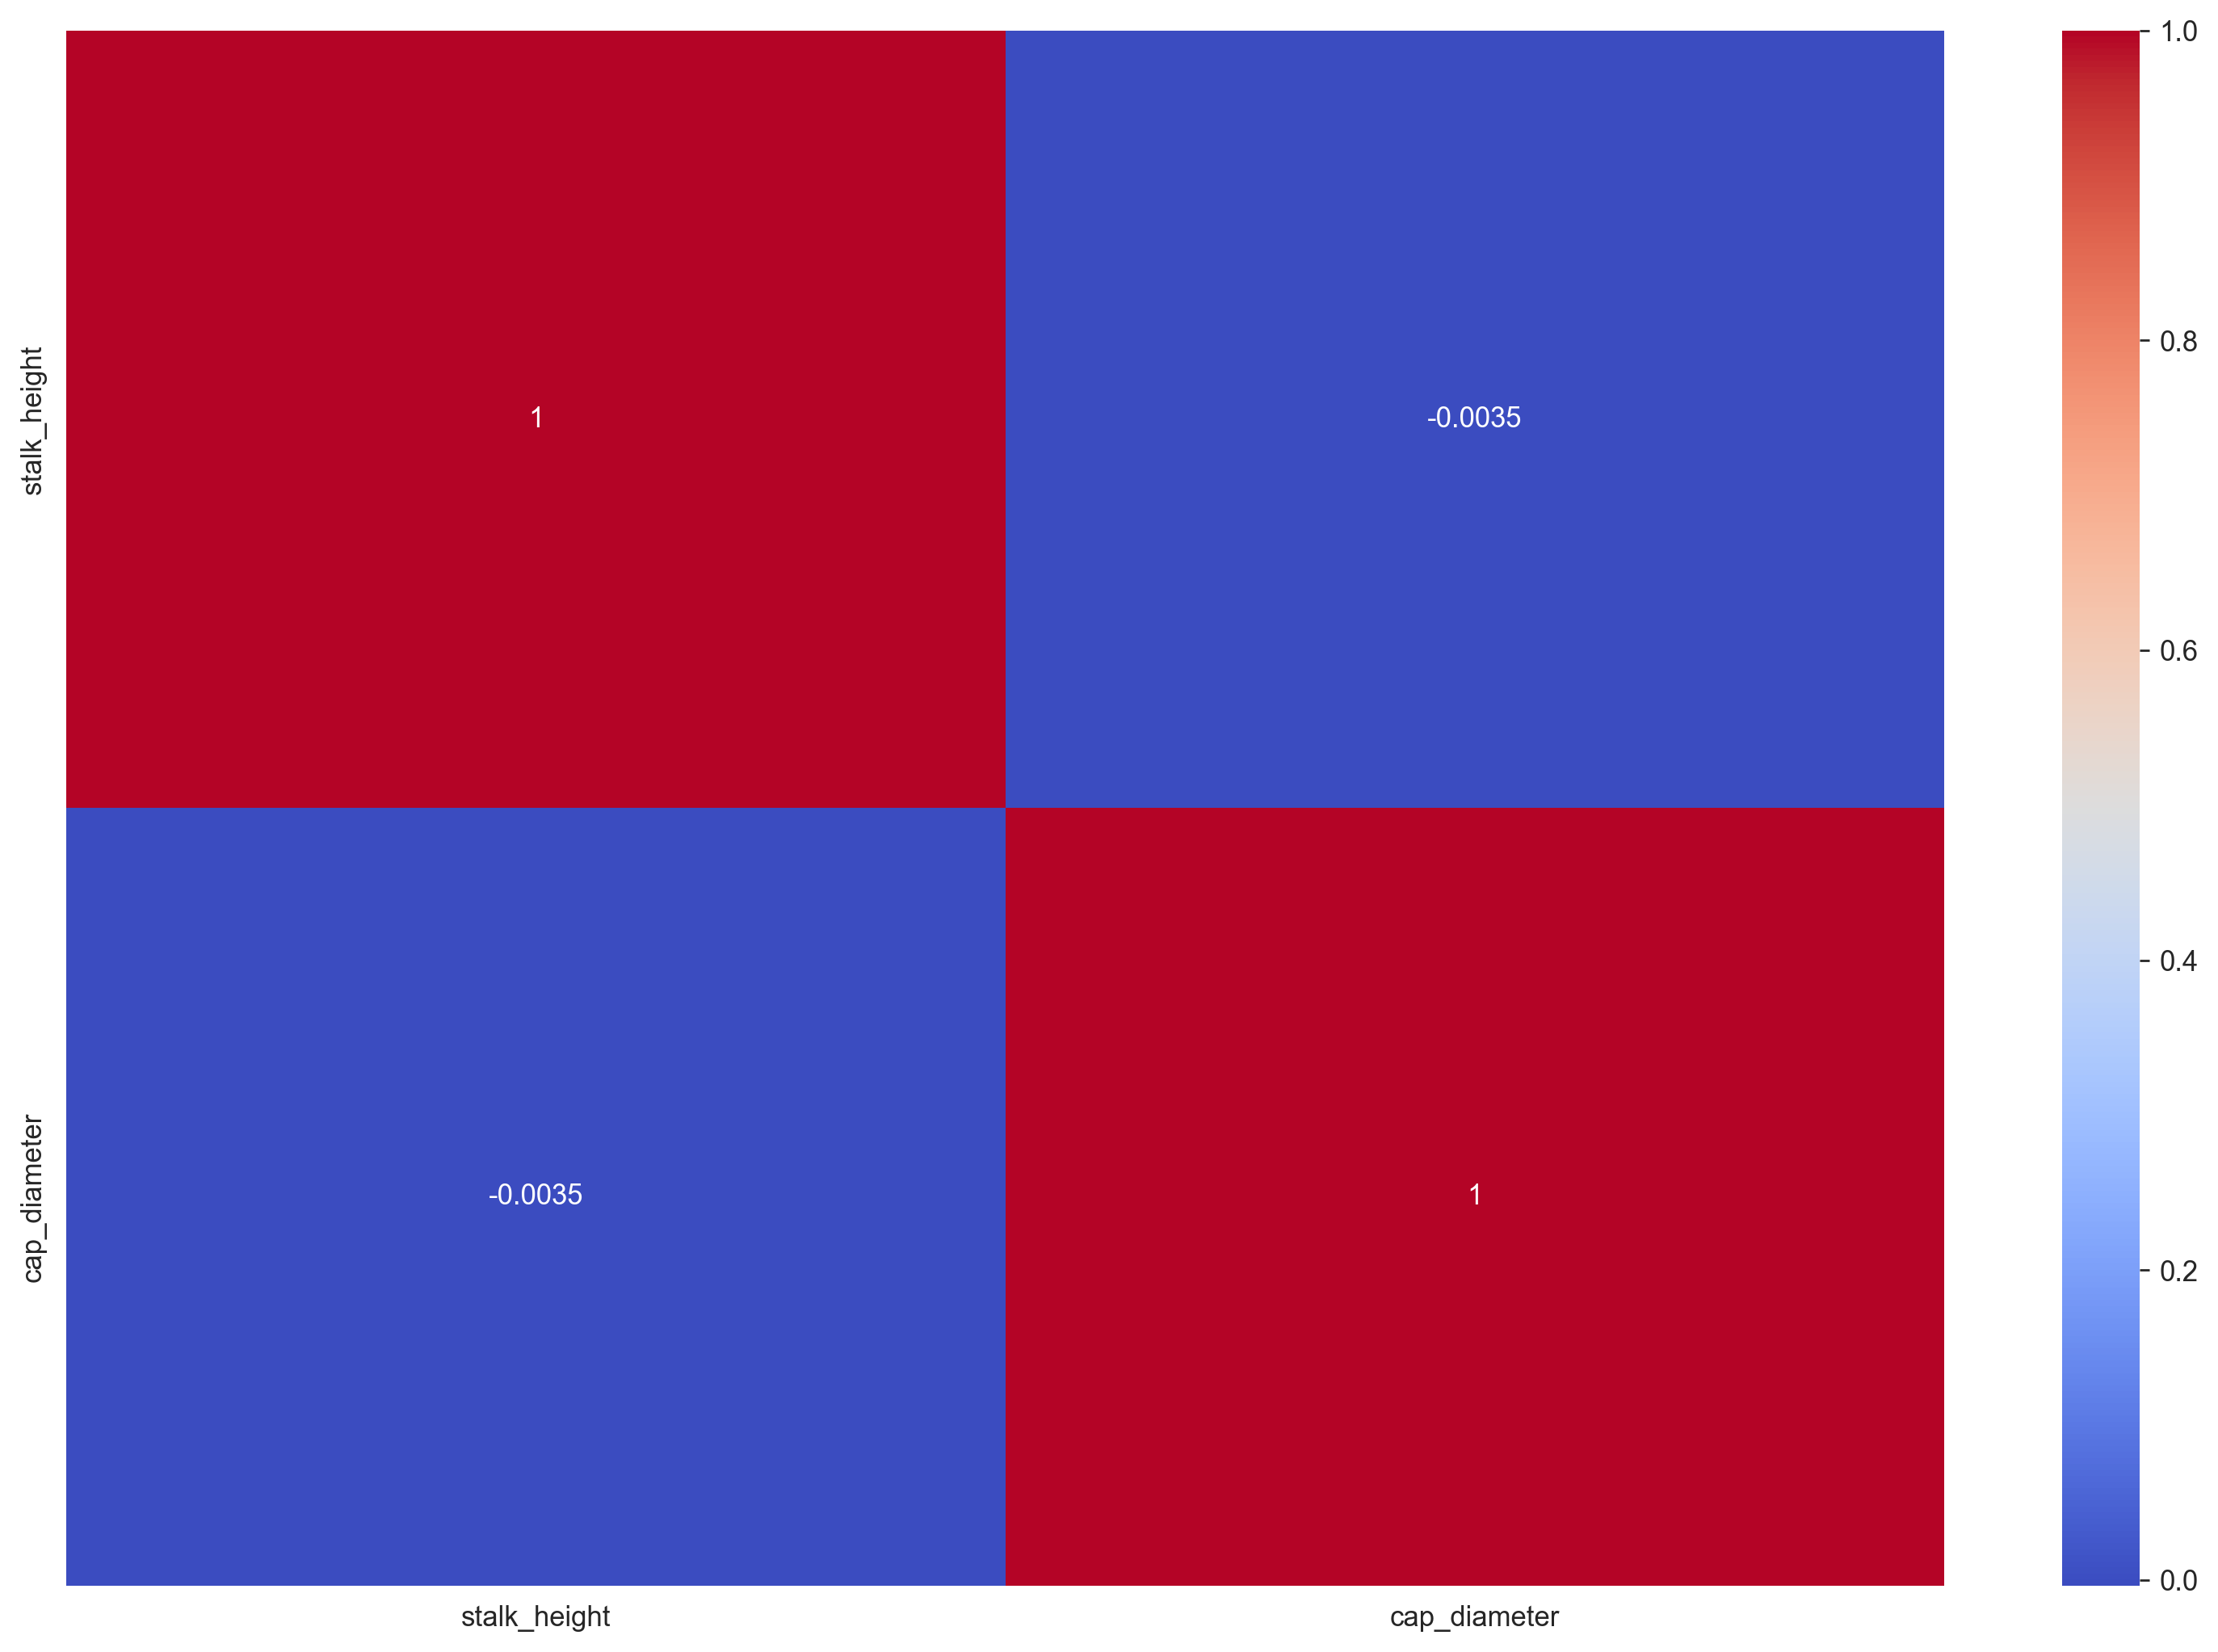

In [9]:
plt.plot(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

Task 2: Data Preprocessing

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [12]:
df

cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0             4            2          7        0     1                1   
1             4            0          6        0     1                3   
2             3            1          5        1     4                1   
3             0            2          4        1     3                3   
4             3            3          8        1     5                2   
...         ...          ...        ...      ...   ...              ...   
1995          4            2          0        1     4                0   
1996          4            2          5        1     5                0   
1997          2            1          3        1     3                3   
1998          0            3          7        0     7                2   
1999          2            2          8        1     7                1   

      gill_spacing  gill_size  gill_color  stalk_shape  ...  veil_type  \
0                2          0           7            1  ...          0   
1                1          1           3            0  ...          1   
2                1          0           8            1  ...          1   
3                0          0           6            0  ...          0   
4                1          1           6            0  ...          1   
...            ...        ...         ...          ...  ...        ...   
1995             1          1           3            1  ...          0   
1996             2          1           9            1  ...          0   
1997             0          1           7            1  ...          0   
1998             0          1           6            0  ...          1   
1999             0          1           8            0  ...          0   

      veil_color  ring_number  ring_type  spore_print_color  population  \
0              0            2          6                  3           1   
1              0            2          6                  1           2   
2              3            2          6                  6           0   
3              3            2          0                  4           1   
4              2            0          4                  8           1   
...          ...          ...        ...                ...         ...   
1995           1            1          2                  6           0   
1996           2            1          7                  8           2   
1997           0            2          1                  8           0   
1998           3            1          0                  1           5   
1999           2            2          3                  7           2   

      habitat  class  stalk_height  cap_diameter  
0           5      1           916           190  
1           5      0           128           750  
2           5      1           537           281  
3           0      1           234           829  
4           4      1           895           484  
...       ...    ...           ...           ...  
1995        1      1           283           680  
1996        5      1           335           521  
1997        6      1           859           438  
1998        6      1           679           320  
1999        4      1           825           832  

[2000 rows x 25 columns]

In [13]:
x = df.drop('class',axis = 1)
y = df['class']

In [14]:
x

cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0             4            2          7        0     1                1   
1             4            0          6        0     1                3   
2             3            1          5        1     4                1   
3             0            2          4        1     3                3   
4             3            3          8        1     5                2   
...         ...          ...        ...      ...   ...              ...   
1995          4            2          0        1     4                0   
1996          4            2          5        1     5                0   
1997          2            1          3        1     3                3   
1998          0            3          7        0     7                2   
1999          2            2          8        1     7                1   

      gill_spacing  gill_size  gill_color  stalk_shape  ...  \
0                2          0           7            1  ...   
1                1          1           3            0  ...   
2                1          0           8            1  ...   
3                0          0           6            0  ...   
4                1          1           6            0  ...   
...            ...        ...         ...          ...  ...   
1995             1          1           3            1  ...   
1996             2          1           9            1  ...   
1997             0          1           7            1  ...   
1998             0          1           6            0  ...   
1999             0          1           8            0  ...   

      stalk_color_below_ring  veil_type  veil_color  ring_number  ring_type  \
0                          8          0           0            2          6   
1                          0          1           0            2          6   
2                          3          1           3            2          6   
3                          5          0           3            2          0   
4                          7          1           2            0          4   
...                      ...        ...         ...          ...        ...   
1995                       4          0           1            1          2   
1996                       4          0           2            1          7   
1997                       6          0           0            2          1   
1998                       5          1           3            1          0   
1999                       0          0           2            2          3   

      spore_print_color  population  habitat  stalk_height  cap_diameter  
0                     3           1        5           916           190  
1                     1           2        5           128           750  
2                     6           0        5           537           281  
3                     4           1        0           234           829  
4                     8           1        4           895           484  
...                 ...         ...      ...           ...           ...  
1995                  6           0        1           283           680  
1996                  8           2        5           335           521  
1997                  8           0        6           859           438  
1998                  1           5        6           679           320  
1999                  7           2        4           825           832  

[2000 rows x 24 columns]

In [15]:
y

0       1
1       0
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: class, Length: 2000, dtype: int32

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

Task 3: Data Visualization

<Axes: xlabel='stalk_height', ylabel='cap_diameter'>

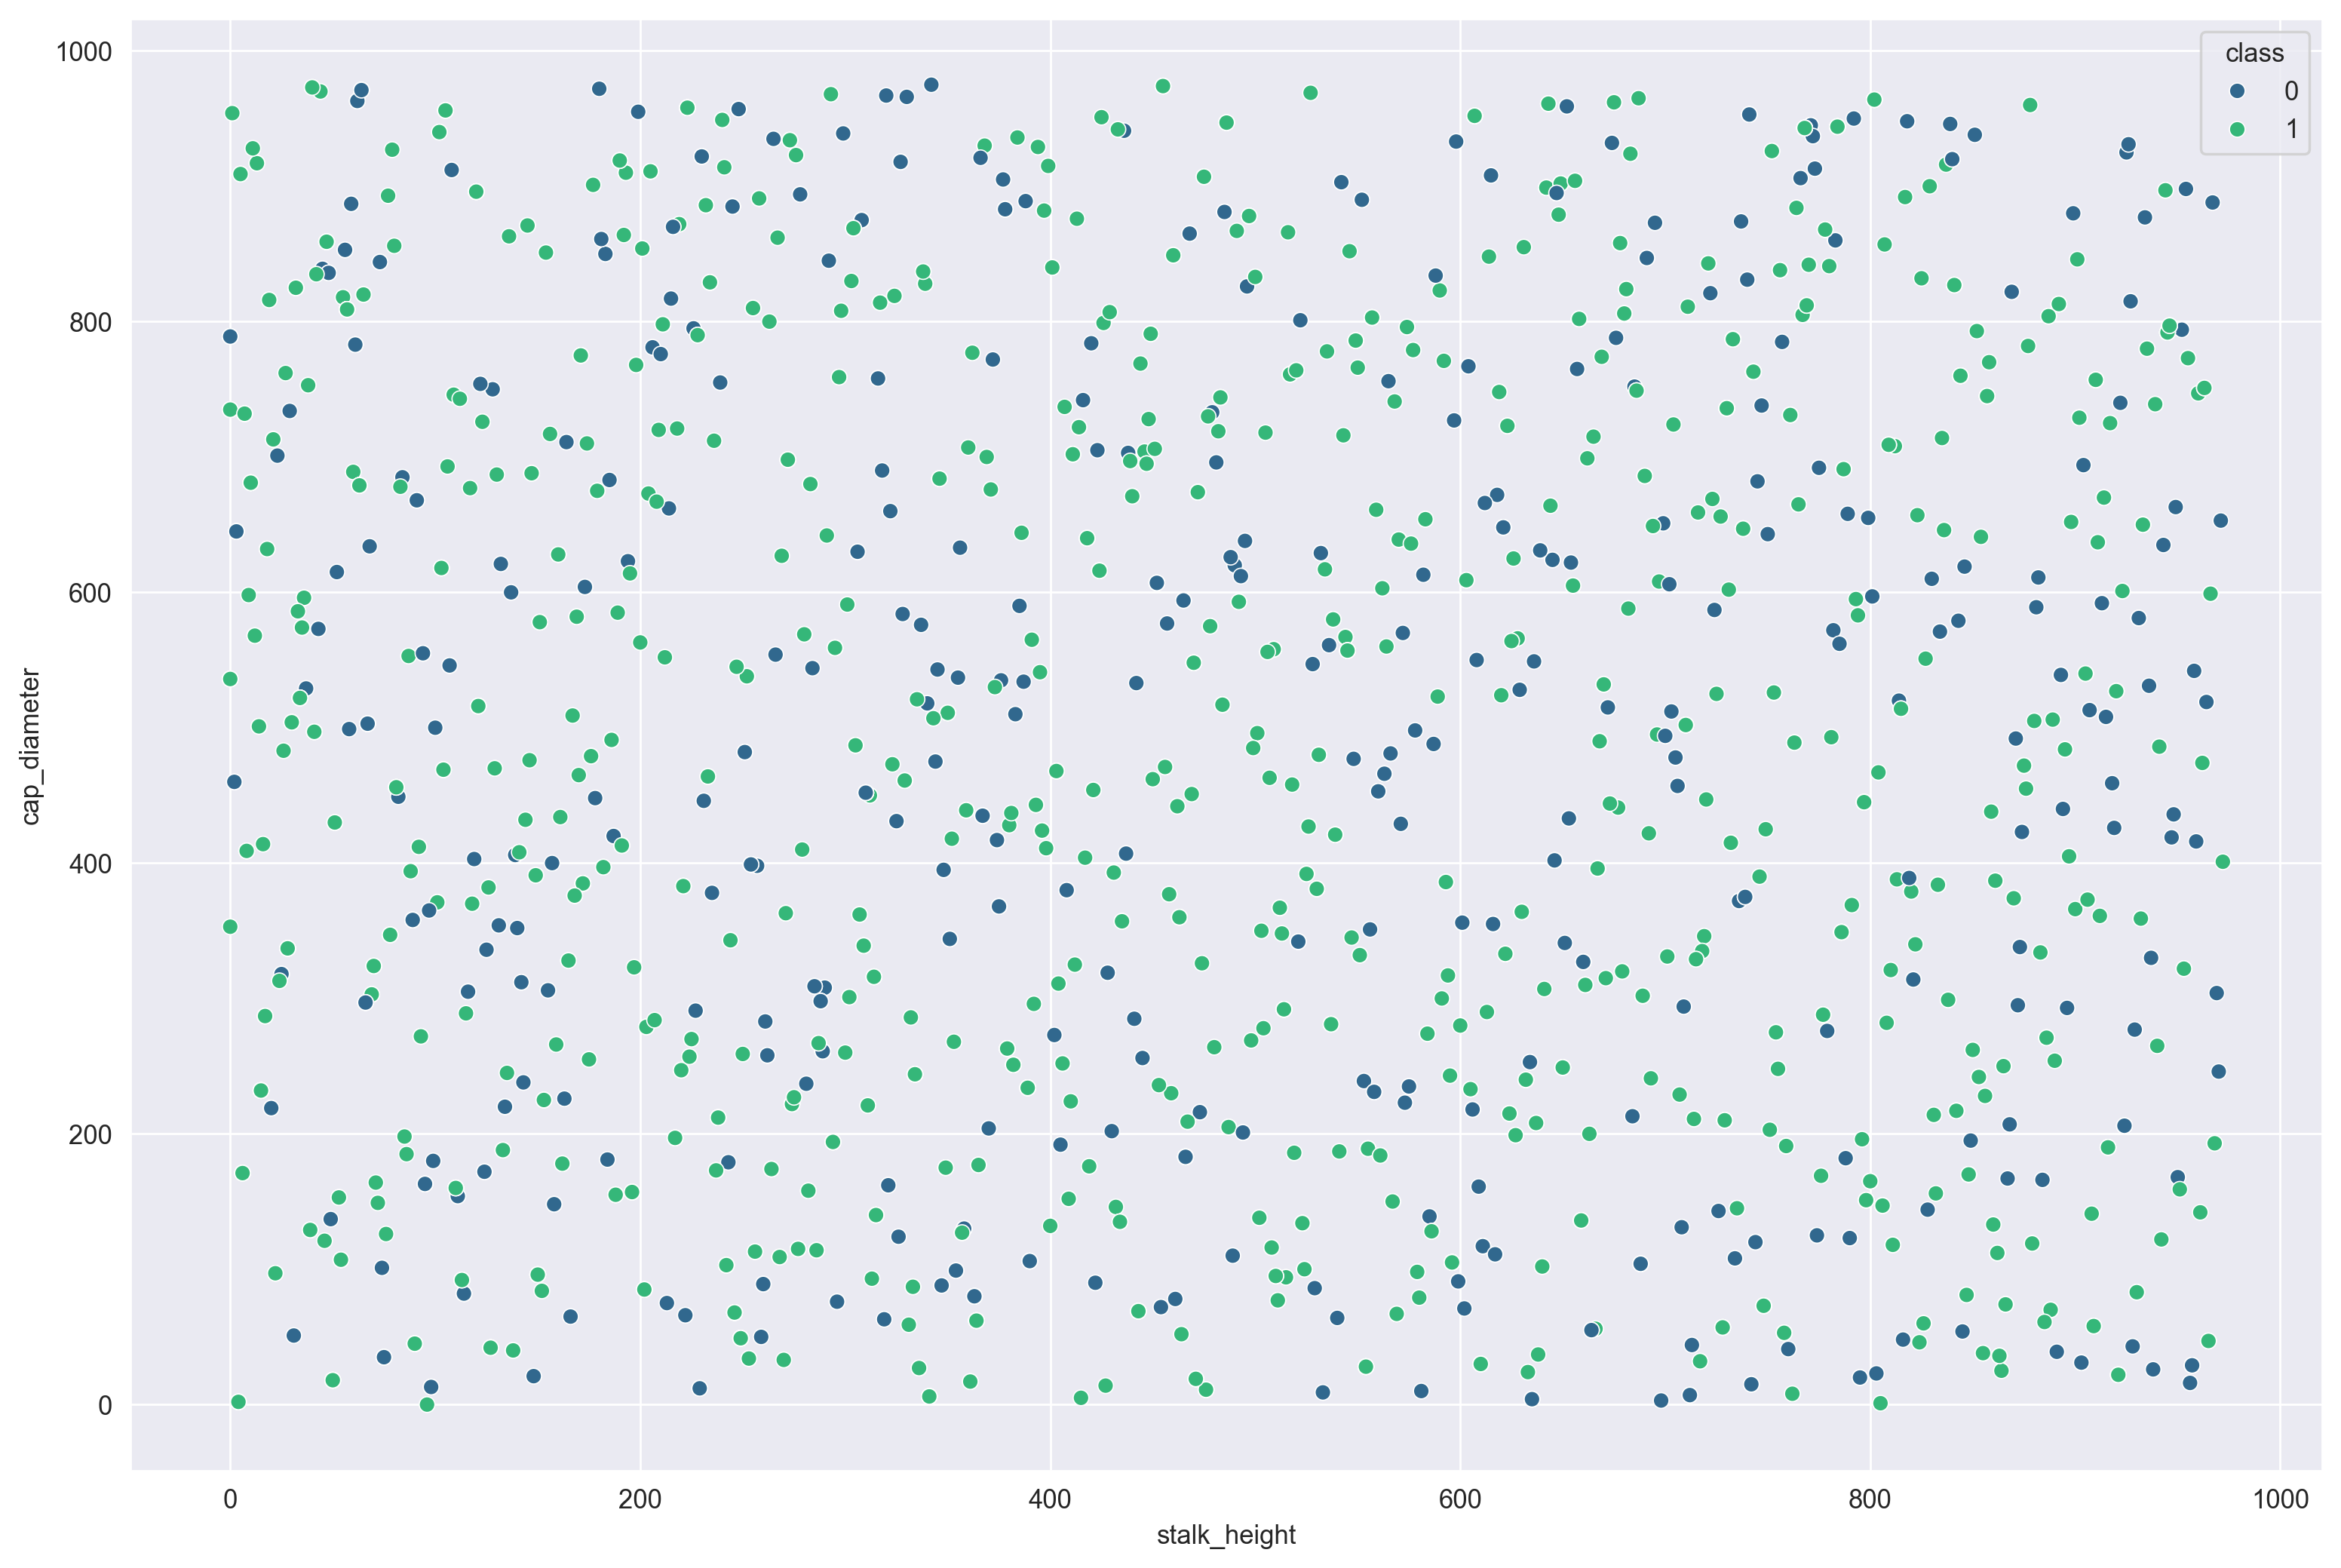

In [18]:
sns.scatterplot(x = df['stalk_height'],y = df['cap_diameter'],hue=df['class'],palette='viridis')

In [19]:
import plotly.express as pe

In [20]:
pe.scatter_3d(data_frame=df,x = 'stalk_height',y = 'cap_diameter',z = 'veil_type',color='class')

Text(0.5, 1.0, 'Class Distribution')

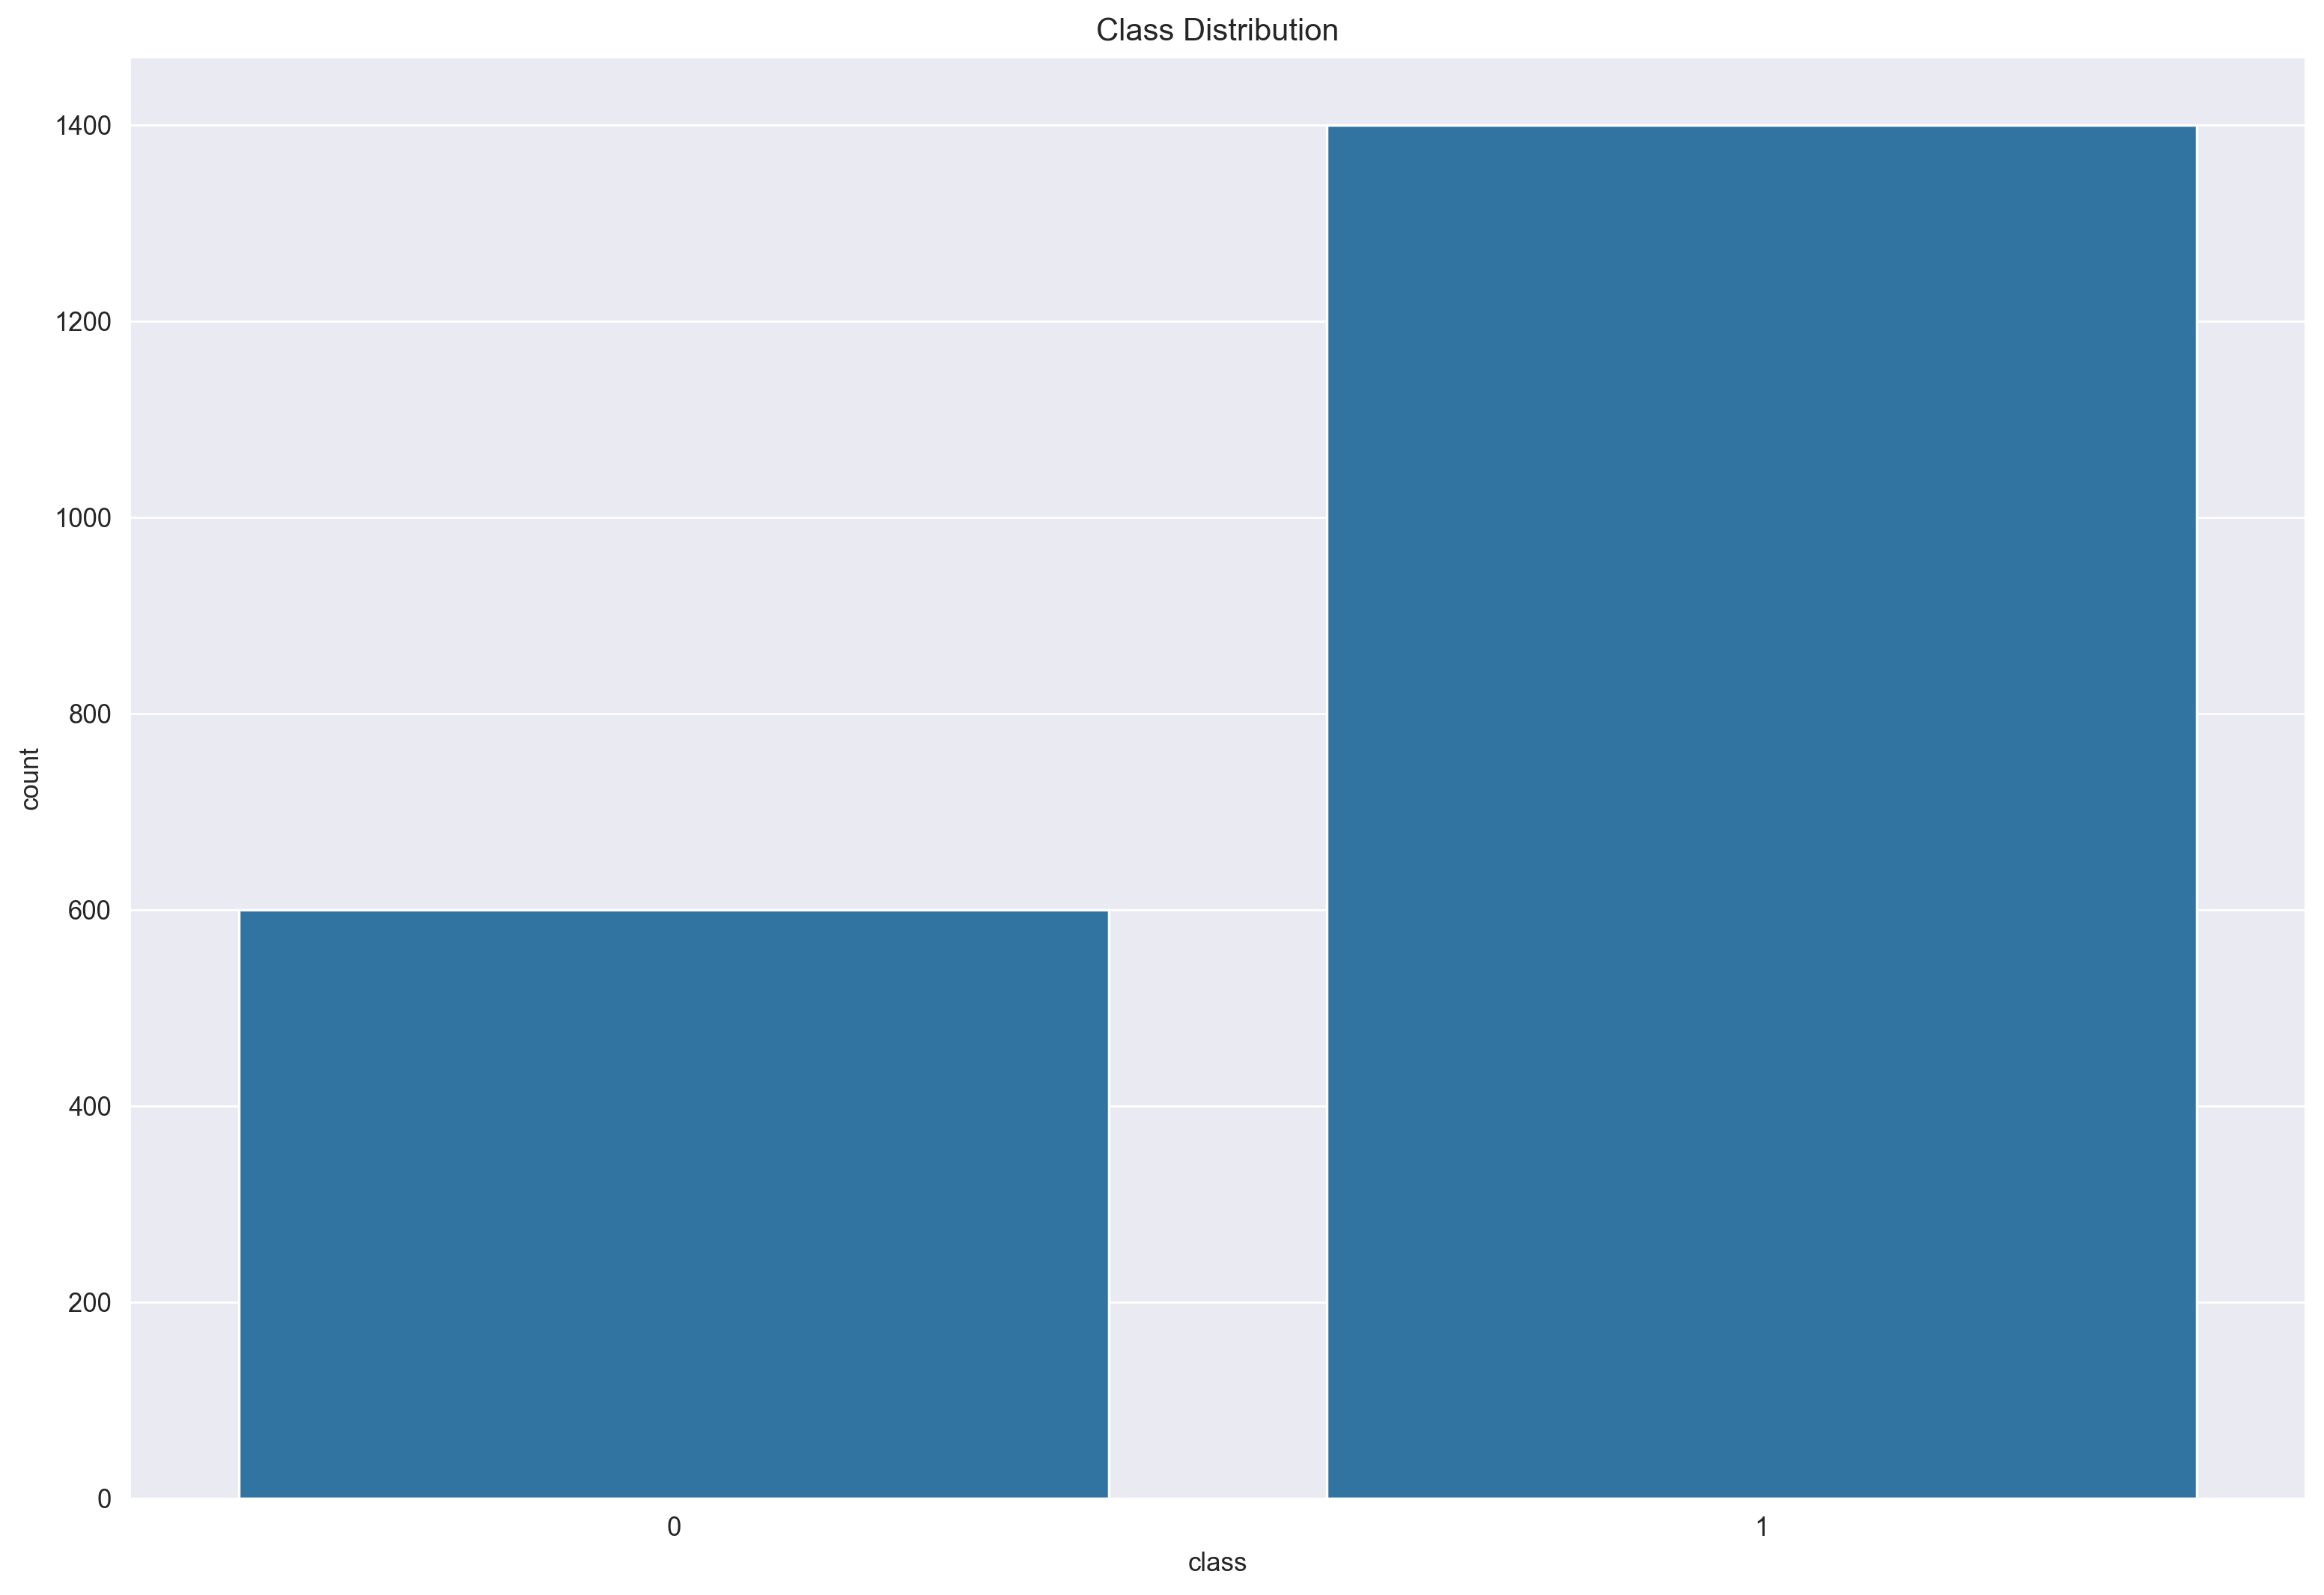

In [21]:
sns.countplot(x='class', data=df)
plt.title('Class Distribution')

Task 4: SVM Implementation

In [22]:
svm = SVC()

In [23]:
svm.fit(xtrain,ytrain)

SVC()

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [25]:
y_pred = svm.predict(xtest)
print(svm.score(xtrain,ytrain))
print(svm.score(xtest,ytest))

0.708125
0.6675


In [26]:
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

In [52]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print('\nClassification Report:\n', classification_report(ytest, y_pred))
print('Confusion Matrix:\n', confusion_matrix(ytest, y_pred))

Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0
F1-score: 0.800599700149925

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.52      0.66       124
           1       0.82      0.97      0.89       276

    accuracy                           0.83       400
   macro avg       0.86      0.75      0.77       400
weighted avg       0.84      0.83      0.82       400

Confusion Matrix:
 [[ 64  60]
 [  7 269]]


Task 5: Visualization of SVM Results

Text(397.55555555555554, 0.5, 'Actual')

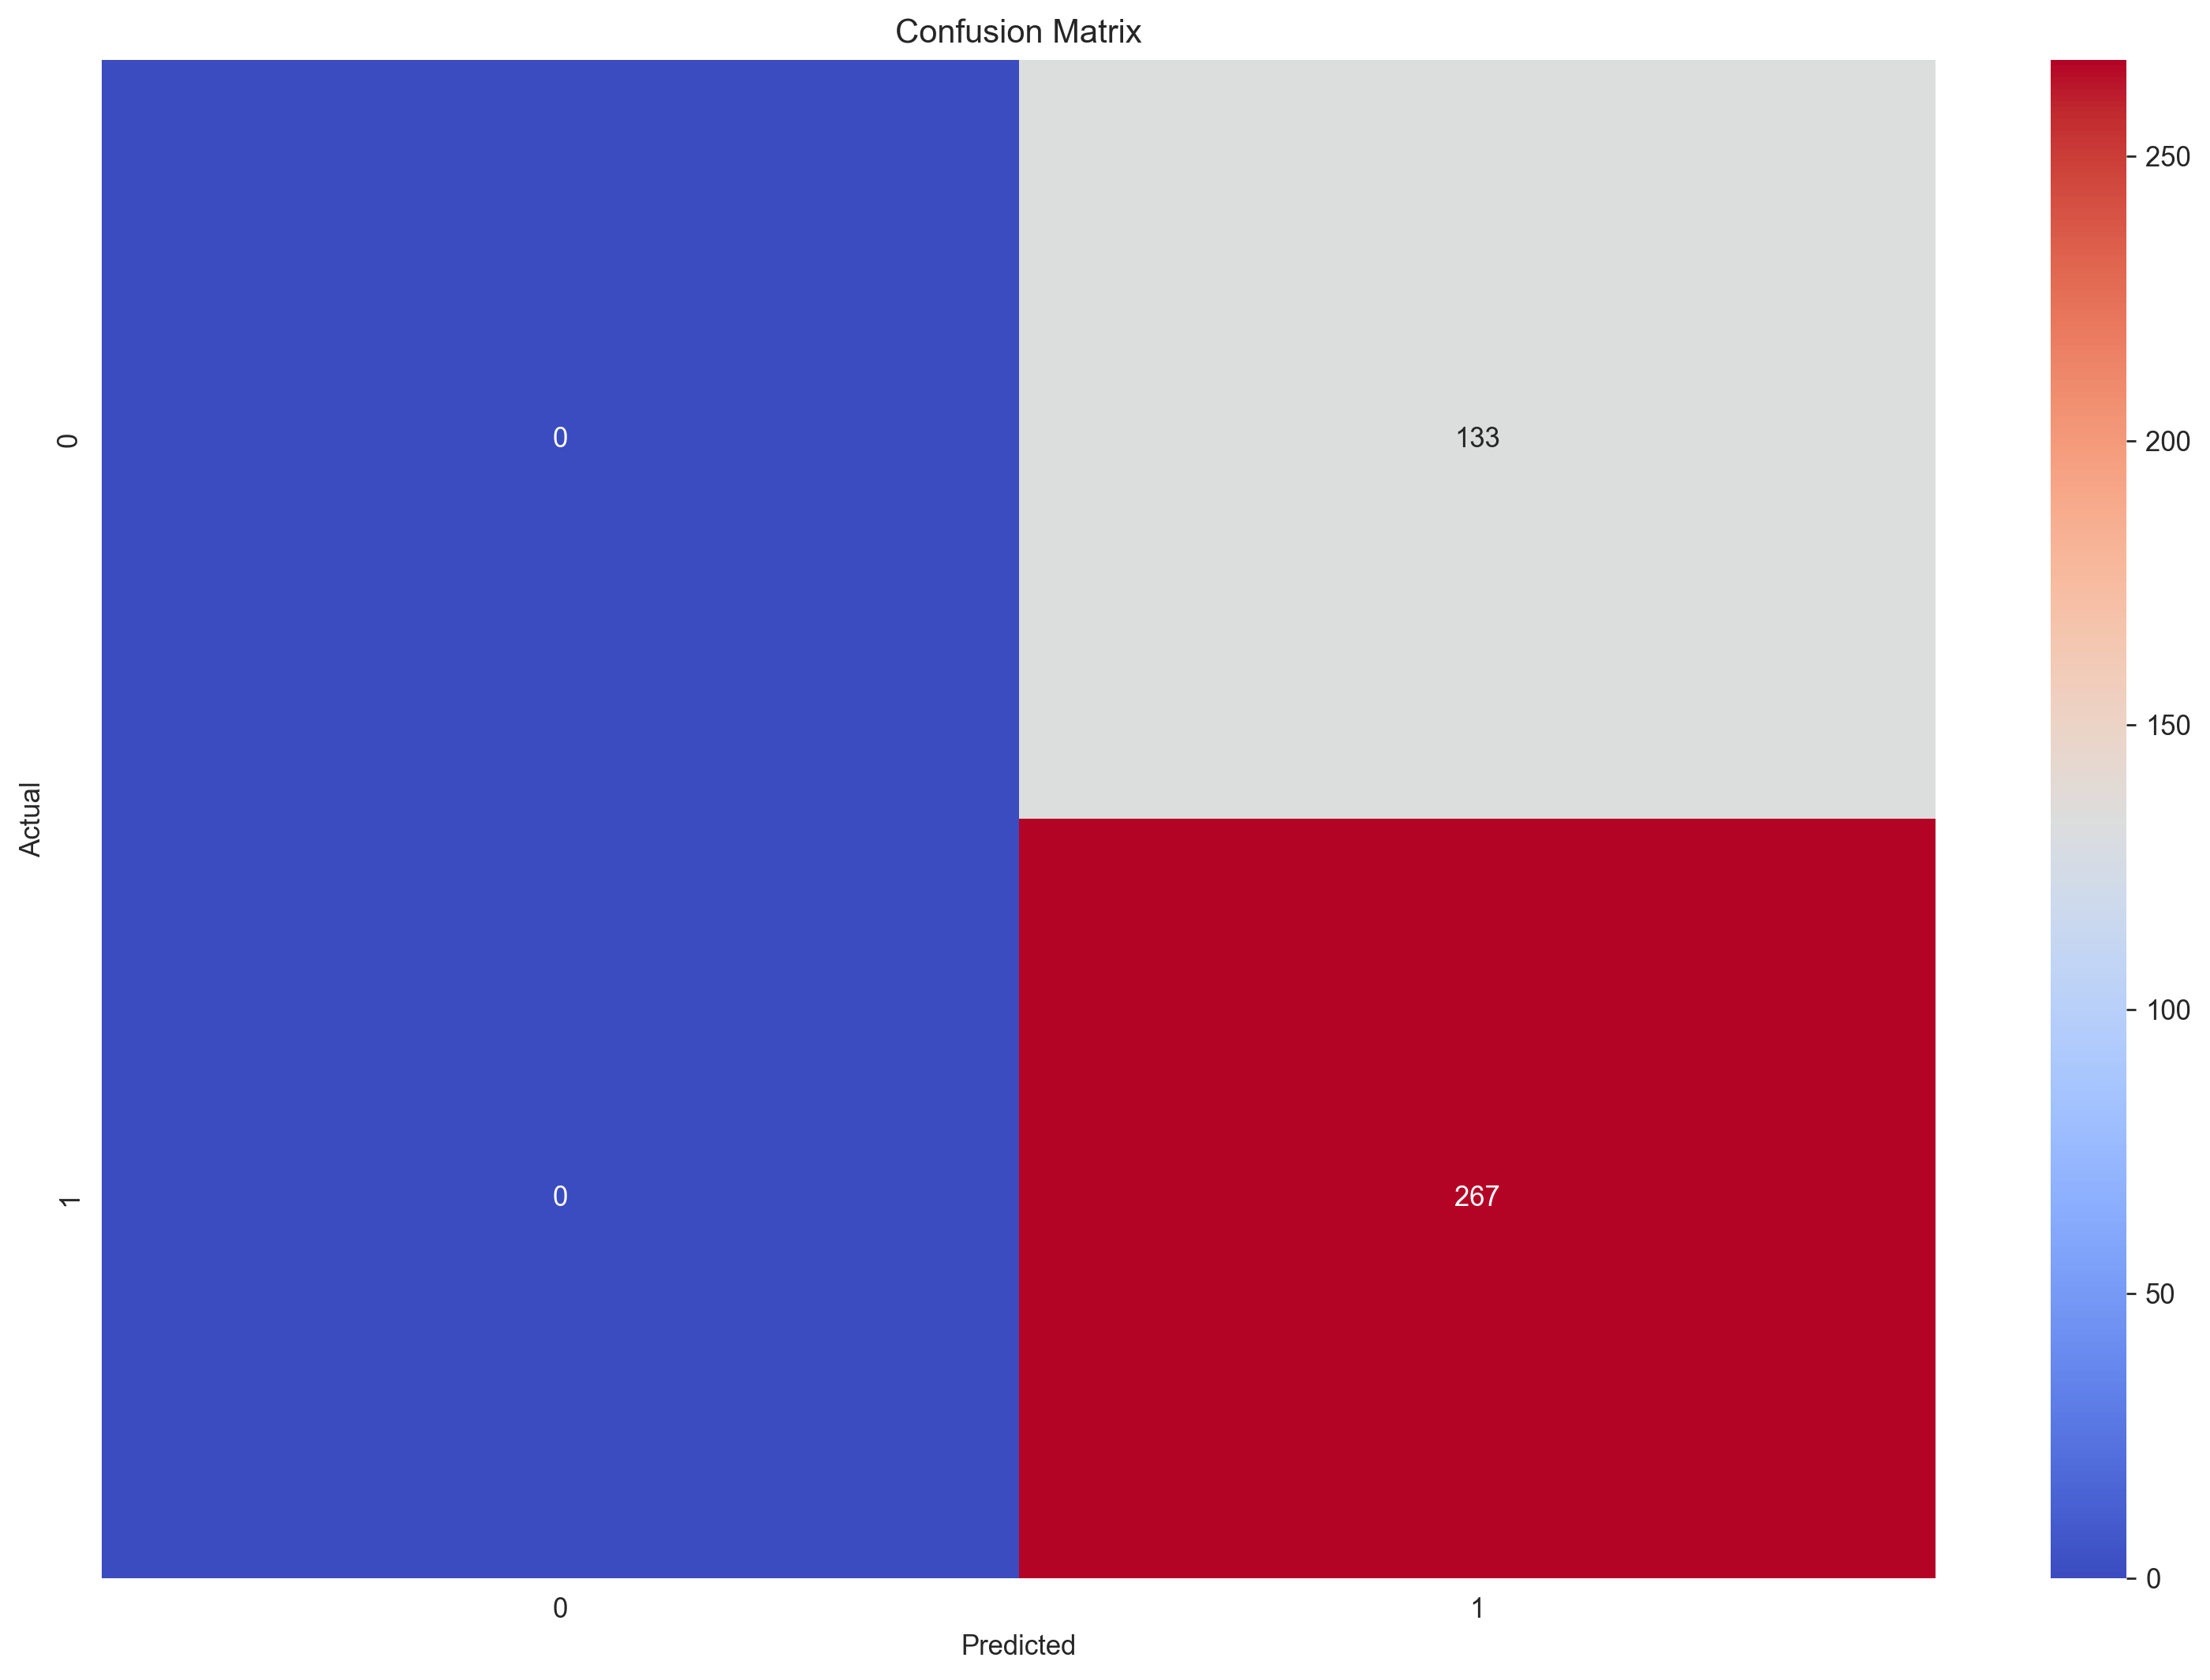

In [28]:
sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Task 6: Parameter Tuning and Optimization

In [29]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [30]:
xtrain

cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
968           4            0          4        0     7                2   
240           3            0          6        1     6                2   
819           1            1          0        0     3                1   
692           4            2          2        1     4                2   
420           4            3          7        1     5                0   
...         ...          ...        ...      ...   ...              ...   
1130          4            2          8        0     1                3   
1294          1            1          6        1     4                3   
860           3            3          0        0     4                0   
1459          4            1          8        0     1                1   
1126          3            3          6        1     0                3   

      gill_spacing  gill_size  gill_color  stalk_shape  ...  \
968              2          1           6            0  ...   
240              0          1          10            0  ...   
819              2          0          11            1  ...   
692              2          1           2            1  ...   
420              1          1           7            0  ...   
...            ...        ...         ...          ...  ...   
1130             0          0           8            1  ...   
1294             2          1           8            0  ...   
860              2          0           6            0  ...   
1459             1          0           4            0  ...   
1126             1          1           5            1  ...   

      stalk_color_below_ring  veil_type  veil_color  ring_number  ring_type  \
968                        8          0           1            1          3   
240                        4          0           1            1          1   
819                        8          0           0            1          2   
692                        5          0           2            1          2   
420                        2          1           1            0          0   
...                      ...        ...         ...          ...        ...   
1130                       4          0           0            0          6   
1294                       8          0           0            0          5   
860                        4          0           3            2          0   
1459                       7          0           2            0          5   
1126                       3          0           1            1          4   

      spore_print_color  population  habitat  stalk_height  cap_diameter  
968                   4           3        2           639           631  
240                   1           2        6           301           591  
819                   4           0        5           349           175  
692                   7           0        2           472           674  
420                   2           1        0           932           359  
...                 ...         ...      ...           ...           ...  
1130                  2           3        6           672           515  
1294                  2           3        0            28           337  
860                   3           4        5           101           371  
1459                  6           4        5           304           869  
1126                  6           4        6           327           918  

[1600 rows x 24 columns]

In [31]:
x

array([[ 1.35664266,  0.39842442,  1.19496641, ...,  0.97916574,
         1.55384785, -1.00667629],
       [ 1.35664266, -1.39628018,  0.81416131, ...,  0.97916574,
        -1.2467361 ,  0.96340142],
       [ 0.66003539, -0.49892788,  0.43335621, ...,  0.97916574,
         0.20686648, -0.68653866],
       ...,
       [-0.03657188, -0.49892788, -0.328254  , ...,  1.4865055 ,
         1.35126754, -0.1342133 ],
       [-1.42978643,  1.29577672,  1.19496641, ...,  1.4865055 ,
         0.71154024, -0.54933682],
       [-0.03657188,  0.39842442,  1.57577151, ...,  0.47182598,
         1.23043016,  1.25187709]])

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [42]:
svm = SVC(kernel = 'rbf')
svm.fit(xtrain,ytrain)
y_pred = svm.predict(xtest)
print(svm.score(xtrain,ytrain))
print(svm.score(xtest,ytest))

0.873125
0.795


In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param = {
    'kernel' : ['linear','rbf','poly','sigmoid']
}

In [45]:
grid = GridSearchCV(SVC(), param_grid= param, verbose=1)

In [46]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=1)

In [48]:
grid.best_params_

{'kernel': 'poly'}

In [49]:
svm = SVC(kernel = 'poly')
svm.fit(xtrain,ytrain)
y_pred = svm.predict(xtest)
print(svm.score(xtrain,ytrain))
print(svm.score(xtest,ytest))

0.930625
0.8325


In [50]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.52      0.66       124
           1       0.82      0.97      0.89       276

    accuracy                           0.83       400
   macro avg       0.86      0.75      0.77       400
weighted avg       0.84      0.83      0.82       400

